# Aprendizaje automático y aplicaciones

## Regresión (caso de estudio)

---
$A^3$ @ FI-UNER : 2021

### Sobre el conjunto de datos

En la ciudad de Ames, Iowa, se realizó el registro de diversas transacciones de compra-venta inmobiliaria desde 2006 a 2010. **El objetivo es identificar variables que permitan predecir el precio de venta de la propiedad**, con el fin de facilitar estimaciones regulatorias y ofrecer una alternativa de tasación a los ciudadanos. Es decir se desea construir un regresor que tome los atributos (o una selección de ellos) y que estime el precio de venta de la propiedad:

$$ \text{ Atributos } \rightarrow \text{Precio de venta}$$

**El dataset contiene 2919 observaciones y un gran número de variables explicativas (23 nominales, 23 ordinales, 14 numéricas discretas, y 20 numéricas contínuas)**. El dataset esta disponible en [este link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). En ese link encontrará un archivo `data_description.txt` que explica todas las variables y sus posibles valores. También encontrará dos archivos de datos: `train.csv` y `test.csv` (cada unoarchivo con aproximadamente 1460 observaciones).
 
El objetivo es hacer el análisis exploratorio y entrenamiento de los modelos con `train.csv`, y luego usar `test.csv` para evaluar el modelo final en datos nunca vistos. El archivo `test.csv` no tiene las etiquetas (el precio de las casas) sino que se utilizará el sistema de Kaggle para enviar las predicciones y así obtener la medida de error. 
Este tipo de esquema asegura que las etiquetas de la particion de test NO influencien el desarrollo, y así evitan el sobreajuste.

### Carga de las librerías a utilizar

In [ ]:
# !pip install pandas-profiling\[notebook\] -q

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

### Lectura de los datos y exploración inicial

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_train.columns, df_train.shape, df_test.shape

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


---

Las herramientas de análisis más potentes, como `pandas-profiling`, nos da información variada y algunas pistas sobre como seguir con el preprocesamiento de los datos.

In [6]:
# ProfileReport(df_train, title="Analisis exploratorio inicial", minimal=True)  # Reporte minimo
# ProfileReport(df_train.sample(frac=.10), title="Analisis exploratorio inicial")  # Reporte con una porcion de los datos
# ProfileReport(df_train, title="Analisis exploratorio inicial", interactions={"targets": ["SalePrice"]})

#ProfileReport(df_train, title="Analisis exploratorio inicial", interactions=None)

### Descripción de los datos

Si contamos con ella también es útil al momento del análisis exploratorio. Ver `data_description.txt`

Por ejemplo, podemos descubrir que:
- Unas cuantas variables usan el valor "NA" como dato válido, y pandas por defecto lo toma como `nan`.
- Hay variables categóricas que se toman como numéricas (por ejemplo MSSubClass)
- Hay variables categóricas ordinales que no se toman como tales (por ejemplo KitchenQual o GarageQual)

In [7]:
# df_train.Alley

## Recarga de los datos con conversión de valores

In [8]:
# Función auxiliar para convertir valores
def NA2None(cell):
    if cell == "NA":
        return "None"
    
NA_converter = {"Alley": NA2None}

df_train = pd.read_csv('train.csv', converters=NA_converter) 
df_test = pd.read_csv('test.csv', converters=NA_converter) 

In [9]:
# df_train.Alley

In [10]:
#ProfileReport(df_train, title="Analisis exploratorio inicial", interactions=None)

### Interacción con algunas variables

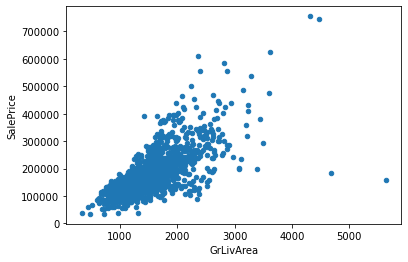

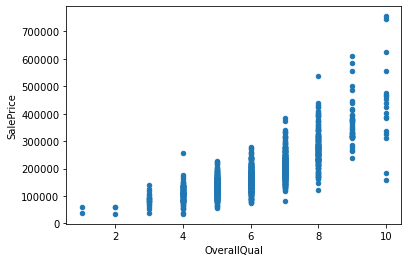

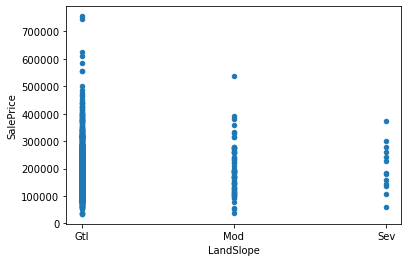

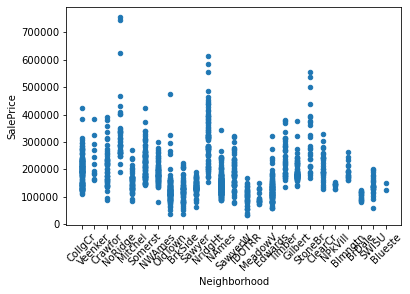

In [11]:
# GrLivArea: superficie habitable sin contar el sotano
df_train.plot.scatter(x="GrLivArea", y="SalePrice")
# OverallQual: calidad general de la vivienda
df_train.plot.scatter(x="OverallQual", y="SalePrice")
# LandSlope: inclinación del terreno 
df_train.plot.scatter(x="LandSlope", y="SalePrice");
# Neighborhood: barrio
df_train.plot.scatter(x="Neighborhood", y="SalePrice", rot=45);

### Limpieza de los datos

Si bien queremos construir un modelo basado en los datos, no siempre es bueno utilizar todos los datos tal cual están. Por ejemplo, podríamos tomar criterios como los siguientes para comenzar el modelado. Consideraciones para filtrar:
- registros de menor superficie habitable 
- operaciones anotadas como normales

In [12]:
criteria = (df_train.GrLivArea <= 2500) & (df_train.SaleCondition == "Normal")

df_train_rev = df_train.loc[criteria]

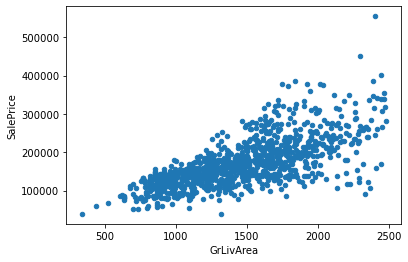

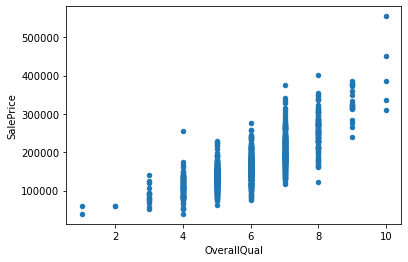

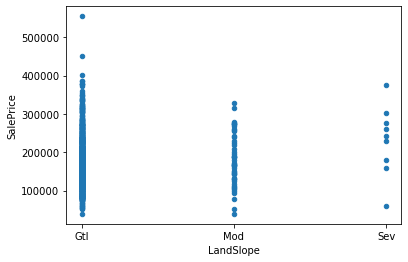

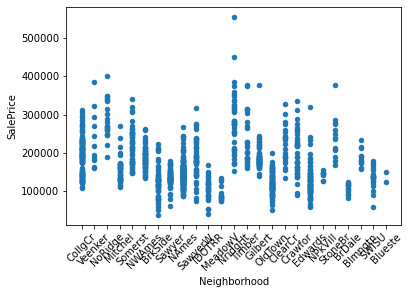

In [13]:
# GrLivArea: superficie habitable sin contar el sotano
df_train_rev.plot.scatter(x="GrLivArea", y="SalePrice")
# OverallQual: calidad general de la vivienda
df_train_rev.plot.scatter(x="OverallQual", y="SalePrice")
# LandSlope: inclinación del terreno 
df_train_rev.plot.scatter(x="LandSlope", y="SalePrice");
# Neighborhood: barrio
df_train_rev.plot.scatter(x="Neighborhood", y="SalePrice", rot=45);

## Distribución de `SalePrice`

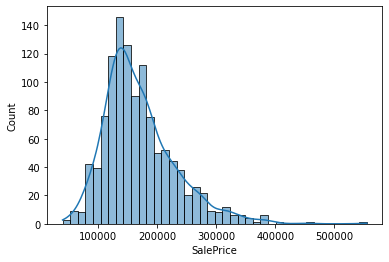

In [14]:
sns.histplot(df_train_rev.loc[:, 'SalePrice'], kde=True);

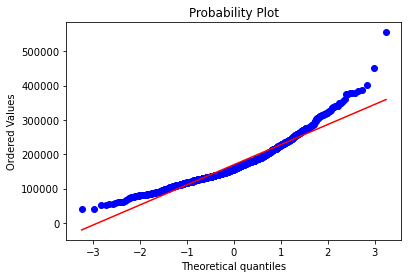

In [15]:
# Se acerca a una distribución gaussiana?
stats.probplot(df_train_rev.loc[:, 'SalePrice'], plot=plt);

## Transformación de variables de entrada y/o salida

Si lo consideramos necesario se pueden hacer transformación de variables. Por ejemplo, se podría aplicar alguna función a la salida esperada (con el cuidado de invertir la transformación al momento de predecir los valores finales). Más adelante veremos otra estrategia para incorporarlo al pipeline.

In [16]:
df_train_rev.loc[:, "SalePriceLog"] = np.log1p(df_train_rev.loc[:, 'SalePrice'])

C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


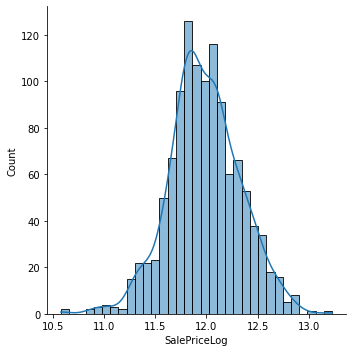

In [17]:
sns.displot(df_train_rev["SalePriceLog"], kde=True);

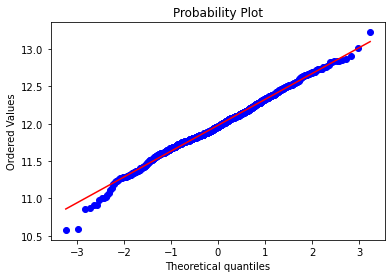

In [18]:
# Se acerca a una distribución gaussiana?
res = stats.probplot(df_train_rev["SalePriceLog"], plot=plt)

---

También se podrían transformar las variables de entrada. Tener en cuenta que al hacerlo "manualmente" deberíamos aplicar lo mismo sobre el conjunto de test.

## Construcción de la matriz de entrada y el vector de salida

In [20]:
features_col = ["GrLivArea", "OverallQual"]

X_train = df_train_rev.loc[:, features_col].values
y_train = df_train_rev.loc[:, "SalePrice"].values

results = {}

## Resultado con Regresión Lineal

[sklearn LinearRegression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

In [21]:
from sklearn.linear_model import LinearRegression

regLR = LinearRegression()

In [22]:
from sklearn.model_selection import cross_validate

scores_to_use = ("r2", "neg_mean_squared_error")

# Validación cruzada con folds y scores definidos
cv_scores = cross_validate(regLR, X_train, y_train, cv=5, scoring=scores_to_use)
results["LR"] = cv_scores

for sc in scores_to_use:
    print(sc, 
          cv_scores[f"test_{sc}"],
          np.mean(cv_scores[f"test_{sc}"]),
          "", sep="\n")

r2
[0.72865354 0.71082117 0.74710309 0.70655252 0.66749252]
0.7121245698889841

neg_mean_squared_error
[-9.05610865e+08 -1.40444316e+09 -8.98380550e+08 -9.03310346e+08
 -1.14700045e+09]
-1051749073.8092201



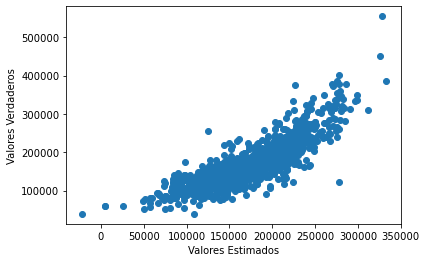

In [23]:
from sklearn.model_selection import cross_val_predict

# Solo realizado a los fines de graficación, no sería necesario.
cv_predicts = cross_val_predict(regLR, X_train, y_train, cv=5)
        
plt.scatter(cv_predicts, y_train)
plt.xlabel("Valores Estimados")
plt.ylabel("Valores Verdaderos");

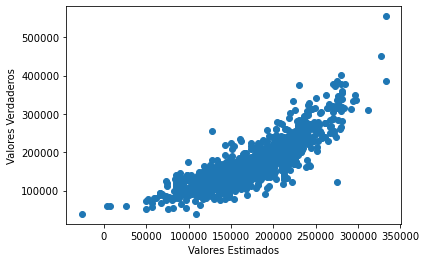

In [24]:
# Si lo entrenáramos con todos los datos tendríamos una gráfica "equivalente" 
# pero sin poder analizar resultados (porque train y validation son lo mismo)
regLR.fit(X_train, y_train)
y_pred = regLR.predict(X_train)

plt.scatter(y_pred, y_train)
plt.xlabel("Valores Estimados")
plt.ylabel("Valores Verdaderos");

## Transformación de la salida (cliping)

[sklearn TransformedTargetRegressor](https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression)

In [25]:
from sklearn.compose import TransformedTargetRegressor

# Regresor lineal básico con transformación de la salida
regLRclip = TransformedTargetRegressor(
    regressor=regLR, 
    func=lambda x: x,                                   # lineal
    inverse_func=lambda x: np.clip(x, 50_000, 350_000), # establece limites
    check_inverse=False
)

cv_scores = cross_validate(regLRclip, X_train, y_train, cv=5, scoring=scores_to_use)  
results["LRclip"] = cv_scores

for sc in scores_to_use:
    print(sc, 
          cv_scores[f"test_{sc}"],
          np.mean(cv_scores[f"test_{sc}"]),
          "", sep="\n")

r2
[0.72865354 0.71679345 0.7483904  0.71078286 0.66755703]
0.7144354579782026

neg_mean_squared_error
[-9.05610865e+08 -1.37543782e+09 -8.93807566e+08 -8.90288217e+08
 -1.14677793e+09]
-1042384478.3365322



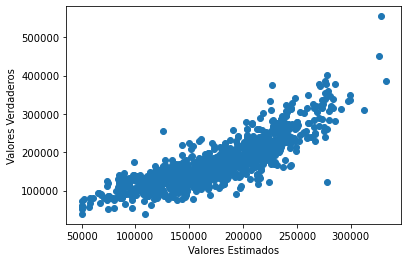

In [26]:
cv_predicts = cross_val_predict(regLRclip, X_train, y_train, cv=5)
plt.scatter(cv_predicts, y_train)
plt.xlabel("Valores Estimados")
plt.ylabel("Valores Verdaderos");

## Transformación de la salida (log exp)

[sklearn TransformedTargetRegressor](https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression)

In [34]:
from sklearn.compose import TransformedTargetRegressor

# Regresor lineal básico con transformación de la salida
regLRlog = TransformedTargetRegressor(
    regressor=regLR, 
    func=np.log1p,         # log(1 + x)
    inverse_func=np.expm1  # exp(x) - 1
)

In [35]:
cv_scores = cross_validate(regLRlog, X_train, y_train, cv=5, scoring=scores_to_use)
results["LRlog"] = cv_scores

for sc in scores_to_use:
    print(sc, 
          cv_scores[f"test_{sc}"],
          np.mean(cv_scores[f"test_{sc}"]), 
          "", sep="\n")

r2
[nan nan nan nan nan]
nan

neg_mean_squared_error
[nan nan nan nan nan]
nan



C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\sklearn\compose\_target.py", line 207, in fit
    self.regressor_.fit(X, y_trans, **fit_params)
  File "C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\sklearn\

In [28]:
cv_predicts = cross_val_predict(regLRlog, X_train, y_train, cv=5)
plt.scatter(cv_predicts, y_train)
plt.xlabel("Valores Estimados")
plt.ylabel("Valores Verdaderos");

NameError: name 'regLRlog' is not defined

## Transformación de las variables de entrada

In [32]:
features_col = ["GrLivArea", "OverallQual", "LandSlope", "Neighborhood"]

X_train = df_train_rev.loc[:, features_col].values
X_test = df_test.loc[:, features_col].values
y_train = df_train_rev.loc[:, "SalePrice"].values

X_train

array([[1710, 7, 'Gtl', 'CollgCr'],
       [1262, 6, 'Gtl', 'Veenker'],
       [1786, 7, 'Gtl', 'CollgCr'],
       ...,
       [2340, 7, 'Gtl', 'Crawfor'],
       [1078, 5, 'Gtl', 'NAmes'],
       [1256, 5, 'Gtl', 'Edwards']], dtype=object)

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

# Se definen las transformaciones para las entradas
preprocessor = make_column_transformer(
#     ("passthrough", [0, 1, 2, 3]),
    (StandardScaler(), [0, 1]),
#     (MinMaxScaler(), [0, 1]),
    (OrdinalEncoder(categories=[("Gtl", "Mod", "Sev")]), [2]),
    (OneHotEncoder(), [3]),
    remainder='passthrough'
)

# Display resultados solo a los fines de ejemplificar
display("original", X_train[212:215])
display("transformed", preprocessor.fit_transform(X_train[212:215]))

'original'

array([[1511, 6, 'Gtl', 'Gilbert'],
       [2192, 5, 'Mod', 'SWISU'],
       [778, 5, 'Gtl', 'IDOTRR']], dtype=object)

'transformed'

array([[ 0.03001998,  1.41421356,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.20945891, -0.70710678,  1.        ,  0.        ,  0.        ,
         1.        ],
       [-1.2394789 , -0.70710678,  0.        ,  0.        ,  1.        ,
         0.        ]])

## Apilado del preprocesamiento y el regresor con transformación de salida

In [36]:
from sklearn.pipeline import make_pipeline

preLRlog = make_pipeline(
    preprocessor,
    regLRlog
)

In [37]:
from sklearn import set_config

set_config(display='diagram')

preLRlog

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(), [0, 1]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[('Gtl',
                                                                              'Mod',
                                                                              'Sev')]),
                                                  [2]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(), [3])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [38]:
cv_scores = cross_validate(preLRlog, X_train, y_train, cv=5, scoring=scores_to_use)
results["preLRlog"] = cv_scores

for sc in scores_to_use:
    print(sc, 
          cv_scores[f"test_{sc}"],
          np.mean(cv_scores[f"test_{sc}"]), 
          "", sep="\n")

r2
[0.83852452 0.8404628  0.81716443 0.83848426 0.79067939]
0.8250630828961965

neg_mean_squared_error
[-5.38919675e+08 -7.74817885e+08 -6.49497535e+08 -4.97188920e+08
 -7.22061448e+08]
-636497092.6266859



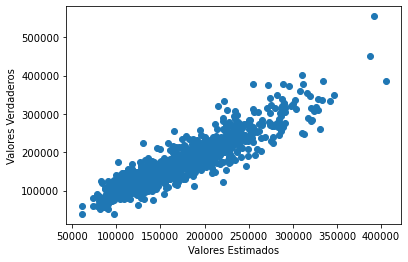

In [39]:
cv_predicts = cross_val_predict(preLRlog, X_train, y_train, cv=5)
plt.scatter(cv_predicts, y_train)
plt.xlabel("Valores Estimados")
plt.ylabel("Valores Verdaderos");

## Optar por otro tipo de regresor

In [40]:
from sklearn.ensemble import RandomForestRegressor

preRFlog = make_pipeline(
    preprocessor,
    RandomForestRegressor(n_estimators=50, max_depth=4, random_state=42)
)

In [41]:
cv_scores = cross_validate(preRFlog, X_train, y_train, cv=5, scoring=scores_to_use[1:])
results["preRFlog"] = cv_scores

# Ya no podemos usar R^2 como métrica, el modelo no es lineal
for sc in scores_to_use[1:]:
    print(sc, 
          cv_scores[f"test_{sc}"],
          np.mean(cv_scores[f"test_{sc}"]), 
          "", sep="\n")

neg_mean_squared_error
[-8.97405091e+08 -1.09442054e+09 -8.34126619e+08 -7.45153777e+08
 -8.98878978e+08]
-893997001.5814409



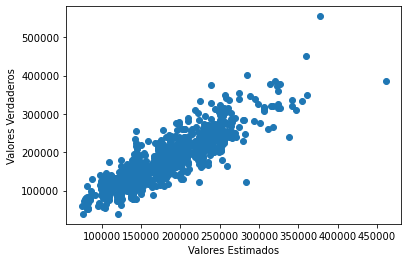

In [42]:
cv_predicts = cross_val_predict(preRFlog, X_train, y_train, cv=5)
plt.scatter(cv_predicts, y_train)
plt.xlabel("Valores Estimados")
plt.ylabel("Valores Verdaderos");

## Optimizar un hiperparámetro del modelo

In [43]:
preRFlog.steps

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('standardscaler', StandardScaler(), [0, 1]),
                                  ('ordinalencoder',
                                   OrdinalEncoder(categories=[('Gtl', 'Mod',
                                                               'Sev')]),
                                   [2]),
                                  ('onehotencoder', OneHotEncoder(), [3])])),
 ('randomforestregressor',
  RandomForestRegressor(max_depth=4, n_estimators=50, random_state=42))]

In [44]:
from sklearn.model_selection import GridSearchCV

param_to_explore = {"n_estimators": [5, 50, 500]}

# En el pipeline mismo se define una busquerda de los hiperparámetros
preRFcvlog = make_pipeline(
    preprocessor,
    GridSearchCV(RandomForestRegressor(max_depth=4, random_state=42), 
                 param_grid=param_to_explore, verbose=2, cv=2)
)

In [45]:
cv_scores = cross_validate(preRFcvlog, X_train, y_train, cv=5, scoring=scores_to_use[1:])
results["preRFcvlog"] = cv_scores

# Ya no podemos usar R^2 como métrica, el modelo no es lineal
for sc in scores_to_use[1:]:
    print(sc, 
          cv_scores[f"test_{sc}"],
          np.mean(cv_scores[f"test_{sc}"]), 
          "", sep="\n")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ...................................n_estimators=500; total time=   0.4s
[CV] END ...................................n_estimators=500; total time=   0.4s
Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ...................................n_estimators=500; total time

In [46]:
metric_to_plot = "test_neg_mean_squared_error"
results_to_plot = {}

for reg_name in results:
    results_to_plot[reg_name] = results[reg_name][metric_to_plot] * -1.0

results_to_plot = pd.DataFrame(results_to_plot)
results_to_plot

,LR,LRclip,LRlog,preLRlog,preRFlog,preRFcvlog
0,9.056109e+08,9.056109e+08,8.351012e+08,5.389197e+08,8.974051e+08,9.039755e+08
1,1.404443e+09,1.375438e+09,1.115735e+09,7.748179e+08,1.094421e+09,1.077742e+09
2,8.983806e+08,8.938076e+08,7.453573e+08,6.494975e+08,8.341266e+08,8.365111e+08
3,9.033103e+08,8.902882e+08,7.410398e+08,4.971889e+08,7.451538e+08,7.303998e+08
4,1.147000e+09,1.146778e+09,1.061180e+09,7.220614e+08,8.988790e+08,8.988790e+08


In [47]:
results_to_plot.melt()

,variable,value
0,LR,9.056109e+08
1,LR,1.404443e+09
2,LR,8.983806e+08
3,LR,9.033103e+08
4,LR,1.147000e+09
5,LRclip,9.056109e+08
6,LRclip,1.375438e+09
7,LRclip,8.938076e+08
8,LRclip,8.902882e+08
9,LRclip,1.146778e+09


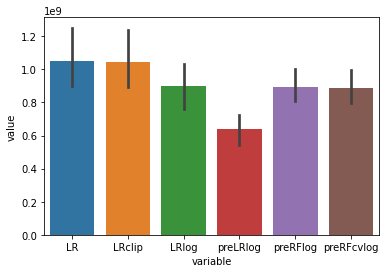

In [48]:
sns.barplot(x="variable", y="value" ,data=results_to_plot.melt());

## Predicciones sobre el conjunto de test

Considerando los resultados obtenidos, seleccionamos el mejor modelo, lo entrenamos con la partición de train y predecimos sobre la partición de test.

In [49]:
preLRlog.fit(X_train, y_train)  # Entrenamiento con todos los datos de train

y_pred = preLRlog.predict(X_test)  # Predicciones sobre todos los de test
y_pred

array([122337.25938672, 156102.39114569, 155487.01000202, ...,
       139661.41807974, 129679.11357844, 236391.67865609])

In [50]:
# Generar archivo para subir a kaggle

submission_df = pd.DataFrame({"Id": df_test.loc[:, "Id"], 
                              "SalePrice": y_pred})

submission_df.to_csv("submission_preLRlog.csv", index=False)

# Resultado obtenido: 
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques
# 0.17366 Root mean squared logarithmic error

submission_df

,Id,SalePrice
0,1461,122337.259387
1,1462,156102.391146
2,1463,155487.010002
3,1464,173568.892466
4,1465,217996.923540
...,...,...
1454,2915,92778.207178
1455,2916,92778.207178
1456,2917,139661.418080
1457,2918,129679.113578
